In [1]:
# -*- coding: UTF-8 -*-


# 机器学习开发流程：
* 1、数据加载
* 2、数据进行清洗
* 3、获取我们的数据的特征属性X和目标属性Y
* 4、数据分割【指的是把数据划分为训练集和测试集】
* 5、特征工程  正则化、标准化，文本的处理
* 6、构建模型
* 7、训练模型
* 8、模型效果的评估 （效果不好，返回第二步进行优化，达到要求）
* 9、模型保存/模型的持久化     

In [1]:
import pandas as pd
import numpy as np
import sys
from sklearn.model_selection import train_test_split # 划分训练集和测试集
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 1. 加载数据(数据一般存在于磁盘或者数据库)
path = '../datas/iris.data'
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df = pd.read_csv(path, header=None, names=names, sep=",")
print(df.head())
print(df.shape)
print(df["label"].value_counts())

   sepal length  sepal width  petal length  petal width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64


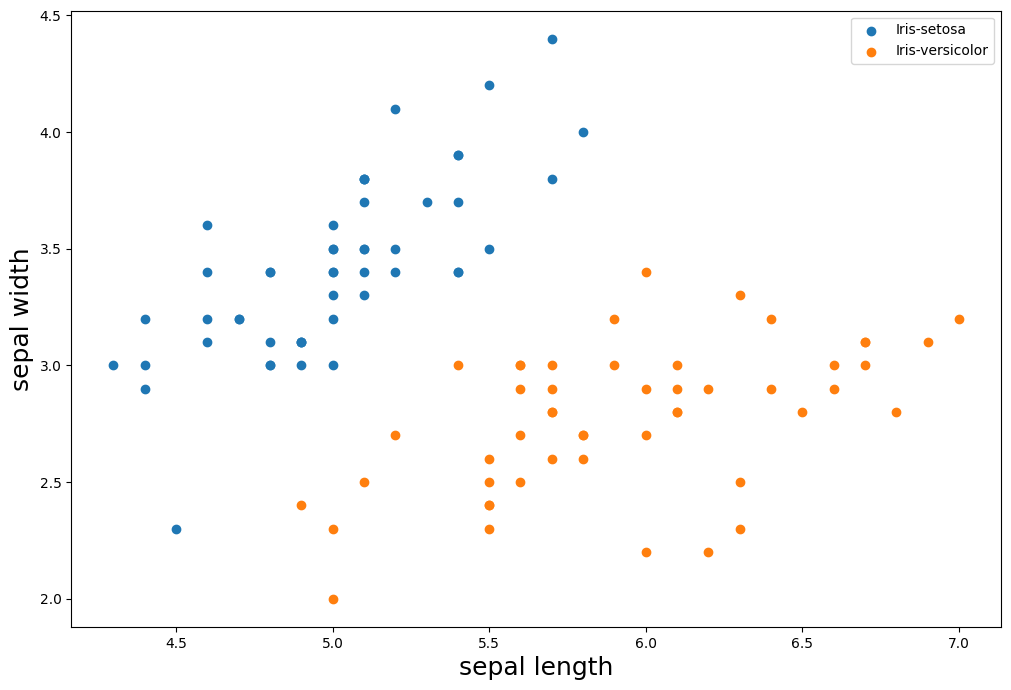

In [3]:
# 数据分析与可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='Iris-setosa')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='Iris-versicolor')
plt.xlabel('sepal length', fontsize=18)
plt.ylabel('sepal width', fontsize=18)
plt.legend()
plt.show()

In [4]:
# 2. 数据清洗
# NOTE: 不需要做数据处理
# def parse_record(row):
#     result = []
#     r = zip(names, row)
#     for name, value in r:
#         if name == 'cla':
#             if value == 'Iris-setosa':
#                 result.append(1)
#             elif value == 'Iris-versicolor':
#                 result.append(2)
#             elif value == 'Iris-virginica':
#                 result.append(3)
#             else:
#                 result.append(0)
#         else:
#             result.append(value)
#     return result
#
#
# df = df.apply(lambda row: pd.Series(parse_record(row), index=names), axis=1)
# df.cla = df.cla.astype(np.int32)
# df.info()
# # print(df.cla.value_counts())
# # df = df[df.cla != 3]
# # print(df.cla.value_counts())

In [5]:
# # 3. 根据需求获取最原始的特征属性矩阵X和目标属性Y
X = df[names[0:-1]]
print(X.shape)
Y = df[names[-1]]
print(Y.value_counts())


(150, 4)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64


In [6]:
# 4. 数据分割
# train_size: 给定划分之后的训练数据的占比是多少，默认0.75
# random_state：给定在数据划分过程中，使用到的随机数种子，默认为None，使用当前的时间戳；给定非None的值，可以保证多次运行的结果是一致的。
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.6, random_state=28)
print("训练数据X的格式:{}, 以及类型:{}".format(x_train.shape, type(x_train)))
print("测试数据X的格式:{}".format(x_test.shape))
print("训练数据Y的类型:{}".format(type(y_train)))

训练数据X的格式:(90, 4), 以及类型:<class 'pandas.core.frame.DataFrame'>
测试数据X的格式:(60, 4)
训练数据Y的类型:<class 'pandas.core.series.Series'>


In [7]:
# 5. 特征工程的操作
# NOTE: 这里暂时不做特征工程

### Scikit-learn实例
#### sklearn.neighbors.KNeighborsClassifier

- n_neighbors: 临近点个数，即k的个数，默认是5
- p: 距离度量，默认
- algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
- weights: 确定近邻的权重

- n_neighbors ： int，optional(default = 5)
默认情况下kneighbors查询使用的邻居数。就是k-NN的k的值，选取最近的k个点。

- weights ： str或callable，可选(默认=‘uniform’)
默认是uniform，参数可以是uniform、distance，也可以是用户自己定义的函数。uniform是均等的权重，就说所有的邻近点的权重都是相等的。distance是不均等的权重，距离近的点比距离远的点的影响大。用户自定义的函数，接收距离的数组，返回一组维数相同的权重。
- algorithm ： {‘auto’，‘ball_tree’，‘kd_tree’，‘brute’}，可选
快速k近邻搜索算法，默认参数为auto，可以理解为算法自己决定合适的搜索算法。除此之外，用户也可以自己指定搜索算法ball_tree、kd_tree、brute方法进行搜索，brute是蛮力搜索，也就是线性扫描，当训练集很大时，计算非常耗时。kd_tree，构造kd树存储数据以便对其进行快速检索的树形数据结构，kd树也就是数据结构中的二叉树。以中值切分构造的树，每个结点是一个超矩形，在维数小于20时效率高。ball tree是为了克服kd树高纬失效而发明的，其构造过程是以质心C和半径r分割样本空间，每个节点是一个超球体。

- leaf_size ： int，optional(默认值= 30)
默认是30，这个是构造的kd树和ball树的大小。这个值的设置会影响树构建的速度和搜索速度，同样也影响着存储树所需的内存大小。需要根据问题的性质选择最优的大小。

- p ： 整数，可选(默认= 2)
距离度量公式。在上小结，我们使用欧氏距离公式进行距离度量。除此之外，还有其他的度量方法，例如曼哈顿距离。这个参数默认为2，也就是默认使用欧式距离公式进行距离度量。也可以设置为1，使用曼哈顿距离公式进行距离度量。

- metric ： 字符串或可调用，默认为’minkowski’
用于距离度量，默认度量是minkowski，也就是p=2的欧氏距离(欧几里德度量)。

- metric_params ： dict，optional(默认=None)
距离公式的其他关键参数，这个可以不管，使用默认的None即可。

- n_jobs ： int或None，可选(默认=None)
并行处理设置。默认为1，临近点搜索并行工作数。如果为-1，那么CPU的所有cores都用于并行工作。

In [13]:
# 6. 模型对象的构建
"""
KNN:
    n_neighbors=5,
    weights='uniform',
    algorithm='auto', 
    leaf_size=30,
    p=2,
    metric='minkowski', 
    metric_params=None, 
    n_jobs=1
"""
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree')

In [14]:
# 7. 模型的训练
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [15]:
# 8. 模型效果评估
train_predict = KNN.predict(x_train)
test_predict = KNN.predict(x_test)
print("KNN算法：测试集上的效果(准确率):{}".format(KNN.score(x_test, y_test)))
print("KNN算法：训练集上的效果(准确率):{}".format(KNN.score(x_train, y_train)))

KNN算法：测试集上的效果(准确率):0.95
KNN算法：训练集上的效果(准确率):0.9666666666666667


In [16]:
# 计算召回率、精准率
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [17]:
acc = accuracy_score(y_train,train_predict)
print(acc)
acc_test = accuracy_score(y_test,test_predict)
print(acc_test)

0.9666666666666667
0.95


In [18]:
# 模型的保存与加载
import joblib

joblib.dump(KNN, "./knn.m")  # 保存模型
# joblib.load() # 加载模型

['./knn.m']

In [20]:
#1、加载回复模型
knn_load = joblib.load("./knn.m")

###2、对待预测的数据进行预测 （数据处理好后的数据）

x = [[6.0,2.1,4.6,1.5]]
y_hat = knn_load.predict(x)
print(y_hat)


['Iris-versicolor']


C:\Users\lq\.conda\envs\py37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
